<a href="https://colab.research.google.com/github/pro8mari/code-practice/blob/main/LangGraph_Conditional_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.9/469.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.3 which is incompatible.


In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [7]:
class AgentState(TypedDict):
  number1: int
  operation: str
  number2: int
  finalNumber: int

In [10]:
def adder(state: AgentState)-> AgentState:
  """This node adds two numbers"""
  state['finalNumber'] = state['number1'] + state['number2']
  return state

def subtractor(state: AgentState)-> AgentState:
  """This node subtracts two numbers"""
  state['finalNumber'] = state['number1'] - state['number2']
  return state

def decide_next_node(state: AgentState)-> AgentState:
  """This node will select the next node of the graph"""
  if state['operation'] == "+":
    return "addition_operation"
  elif state['operation'] == "-":
    return "subtraction_operation"


In [12]:
graph = StateGraph(AgentState)
graph.add_node("add_number",adder)
graph.add_node("subtract_number", subtractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges("router",
    decide_next_node,
    {
    "addition_operation": "add_number",
    "subtraction_operation": "subtract_number"
    }
)

graph.add_edge("add_number", END)
graph.add_edge("subtract_number", END)

In [14]:
app = graph.compile()

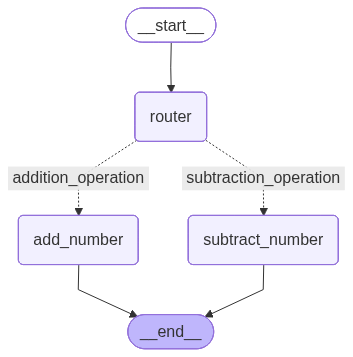

In [17]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
result = AgentState(number1= 450, number2= 35, operation= "-")
print(app.invoke(result))
#result = app.invoke({"number1": 450, "number2": 35, "operation": "-"})
#print(result['finalNumber'])

{'number1': 450, 'operation': '-', 'number2': 35, 'finalNumber': 415}


Task: use two conditional edges.

In [3]:
class AgentState(TypedDict):
  number1: int
  operation: str
  number2: int
  finalNumber: int
  number3: int
  operation2: str
  number4: int
  finalNumber2: int

In [4]:
def adder(state: AgentState)-> AgentState:
  """This node adds two numbers"""
  state['finalNumber'] = state['number1'] + state['number2']
  return state

def subtractor(state: AgentState)-> AgentState:
  """This node subtracts two numbers"""
  state['finalNumber'] = state['number1'] - state['number2']
  return state

def decide_next_node(state: AgentState)-> AgentState:
  """This node will select the next node of the graph"""
  if state['operation'] == "+":
    return "addition_operation"
  elif state['operation'] == "-":
    return "subtraction_operation"

def adder2(state: AgentState)-> AgentState:
  """This node adds two numbers"""
  state['finalNumber2'] = state['number3'] + state['number4']
  return state

def subtractor2(state: AgentState)-> AgentState:
  """This node subtracts two numbers"""
  state['finalNumber'] = state['number3'] - state['number4']
  return state

def decide_next_node2(state: AgentState)-> AgentState:
  """This node will select the next node of the graph"""
  if state['operation2'] == "+":
    return "addition_operation2"
  elif state['operation2'] == "-":
    return "subtraction_operation2"


In [5]:
graph = StateGraph(AgentState)
graph.add_node("add_number",adder)
graph.add_node("subtract_number", subtractor)
graph.add_node("router", lambda state:state)
graph.add_node("add_number2",adder2)
graph.add_node("subtract_number2", subtractor2)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges("router",
    decide_next_node,
    {
    "addition_operation": "add_number",
    "subtraction_operation": "subtract_number"
    }
)

graph.add_edge("add_number", "router2")
graph.add_edge("subtract_number", "router2")

graph.add_conditional_edges("router2",
    decide_next_node2,
    {
    "addition_operation2": "add_number2",
    "subtraction_operation2": "subtract_number2"
    }
)
graph.add_edge("add_number2", END)
graph.add_edge("subtract_number2", END)


In [6]:
app = graph.compile()

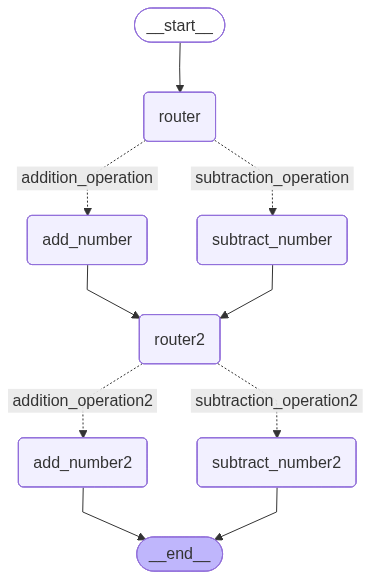

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
result = AgentState(number1= 10, number2= 5, operation= "-", number3= 7, number4= 2, operation2= "+" )
print(app.invoke(result))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber2': 9}
